# **C213: Sistemas Embarcados**
**Professor**: Samuel Baraldi Mafra

**PED:** Igor Gonçalves de Souza

## **Objetivos:**
Este exemplo visa detalhar a criação de modelos de Sistemas de Controle com Atraso de Transporte.

Conteúdo:
  + Atraso de Transporte e Aproximação de Padé;
  + Método `step_info()` e parâmetros de resposta do Sistema;


### **Atraso de Transporte:**
O Atraso de Transporte, ou tempo morto, corresponde ao tempo $\theta$ em que o sistema demora para responder ao estímulo de entrada.  Em sistemas dinâmicos, o Atraso de Transporte pode afetar o processo com possíveis instabilidades ou dificuldades na sintonia do controlador.

Esse atraso pode ser encontrado em sistemas térmicos, hidráulicos e pneumáticos causado por fatores como inércia ou a distância física entre a origem e  o ponto de controle. Com o desenvolvimento de sistemas de controle via redes, sensores e controladores passam a se conectar remotamente seguindo protocolos de comunicação sujeitos a atrasos de processamento e propagação de sinais.

Sendo $\theta$ o tempo de atraso, um Sistema de Primeira Ordem com Atraso de Transporte tem como modelo a Função de Transferência a seguir, em que a parcela irracional $e^{-\theta s}$ representa o atraso. $$$$
    
$$  H(s)=\frac{V_o(s)}{V_i(s)}=\frac{PV(s)}{SP(s)}=\frac{k}{\tau s+1}\cdot e^{-\theta s} $$ $$$$

A Figura a seguir compara um sistema com atraso para $\theta=10$. O Atraso de Transporte desloca a curva de resposta ao longo do tempo, sem modificação na dinâmica de amplitudes. Para a dinâmica temporal $t_0=t+\theta$.

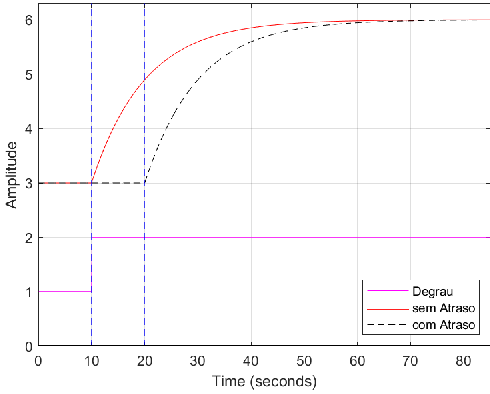

#### **Aproximação de Padé:**
A Aproximação de Padé é uma técnica matemática utilizada para aproximar funções irracionais por meio de frações racionais, ou seja, como a razão de dois polinômios.

Seja $R_{N}(s)$ a aproximação racional por Padé da irracional $F(s)$. A aproximação $R_{N}(s)$ garante a igualdade das funções em torno do ponto $s=0$ para o valor inicial e para as derivadas de $N$ primeiras ordens, em que $N$ é a ordem de $R_{N}(s)$. A aproximação para $R_{N}(s)$ é resultante da razão entre dois polinômios de aproximação $Q_{N}(s)$.

Como resultante, a malha de controle do modelo é um sistema puro em série com a aproximação racional da parcela $e^{-\theta s}$.

### **Pacote Control**
A Biblioteca de Sistemas de Controle Python (python-control) é um pacote que implementa operações básicas para análise e projeto de Sistemas de Controle.

Acesse: [Documentação python-control](https://pypi.org/project/control/)

In [1]:
#!pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 7.3 MB/s eta 0:00:00


In [2]:
import numpy as np                # Suporte para arrays e operações matemáticas.
import control as ctrl            # Suporte para manipulação de Sistemas de Controle.
import matplotlib.pyplot as plt   # Suporte para visualização de gráficos.

### **Sistemas de Primeira Ordem com Atraso de Transporte:**
O pacote python-control não possui a propriedade `InputDelay`, característica do MATLAB para implementação de Modelos com Atraso de Transporte. Para isso, o método `control.pade(T, N)` define o modelo para a N-ésima ordem da Aproximação de Padé dado um atraso $T=\theta$ unidades de tempo. Leia mais em [control.pade](https://python-control.readthedocs.io/en/latest/generated/control.pade.html).

O Exemplo a seguir define a Função de Transferência com $k=1.18$ e $\tau=30$ para um Modelo de Primeira Ordem com Atraso de $10$ unidades de tempo. $$$$
$$H(s)=\frac{V_o(s)}{V_i(s)}=\frac{PV(s)}{SP(s)}=\frac{k}{\tau s+1}\cdot e^{-\theta s}=\frac{1.18}{30s+1}\cdot e^{-10s}$$

In [9]:
sys = ctrl.tf([1.18], [30, 1])
# print(sys)

[num, den] = ctrl.pade(10, 1)
sys_pade = ctrl.tf(num, den)
print(sys_pade)

sys_atraso = ctrl.series(sys, sys_pade)
# print(sys)

<TransferFunction>: sys[12]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


-s + 0.2
--------
s + 0.2



Para observar a Resposta do Sistema de Controle à diferentes tipos de entrada, utilize as fontes:
  - `ctrl.impulse(tf)`: resposta do Sistema de Controle à uma entrada do tipo **Impulso**. Veja mais em [Resposta ao Impulso](https://python-control.readthedocs.io/en/0.10.1/plotting.html#response-functions)
  - `ctrl.step(tf)`: resposta do Sistema de Controle à uma entrada do tipo **Degrau**. Veja mais em [Resposta ao Degrau](https://python-control.readthedocs.io/en/0.10.1/plotting.html#response-functions)

Acesse: [Funções de Resposta](https://python-control.readthedocs.io/en/0.10.1/plotting.html#response-functions) para Resposta do Sistema à outros tipos de entrada.

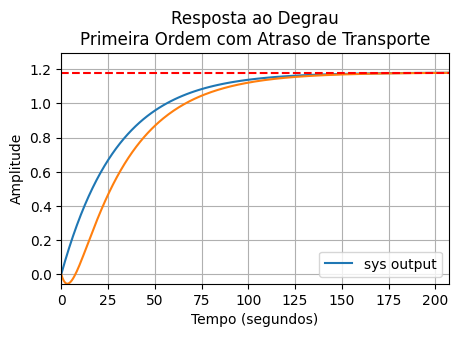

<Figure size 640x480 with 0 Axes>

In [15]:
# Amostras de Amplitude da Resposta ao Degrau ao longo do Tempo.
# ctrl.step_response(sys).plot()
[Tempo, Amplitude] = ctrl.step_response(sys)
plt.figure(figsize=(5, 3)), plt.plot(Tempo, Amplitude)

[Tempo, Amplitude] = ctrl.step_response(sys_atraso)
plt.plot(Tempo, Amplitude), plt.axhline(y=Amplitude[-1], color='r', linestyle='--')

plt.title('Resposta ao Degrau\nPrimeira Ordem com Atraso de Transporte')
plt.xlabel('Tempo (segundos)'), plt.xlim([0, Tempo[-1]])
plt.ylabel('Amplitude'), plt.ylim([np.min(Amplitude), np.max(Amplitude)*1.1])
plt.legend(['sys output'], loc='lower right'), plt.grid(True)

print(), plt.show(), plt.savefig('Degrau.png', dpi=300);

Por curiosidade, a Aproximação de Padé define um Modelo de Fase não Mínima, justificando um comportamento com *undershoot*.

O Exemplo a seguir mostra o efeito da ordem da Aproximação de Padé na Função de Transferência equivalente do Sistema de Primeira Ordem com $k=1.18$ e $\tau=75$ para um Atraso $\theta=50$ unidades de tempo. $$$$
$$H(s)=\frac{V_o(s)}{V_i(s)}=\frac{PV(s)}{SP(s)}=\frac{k}{\tau s+1}\cdot e^{-\theta s}=\frac{1.18}{75s+1}\cdot e^{-50s}$$ $$$$

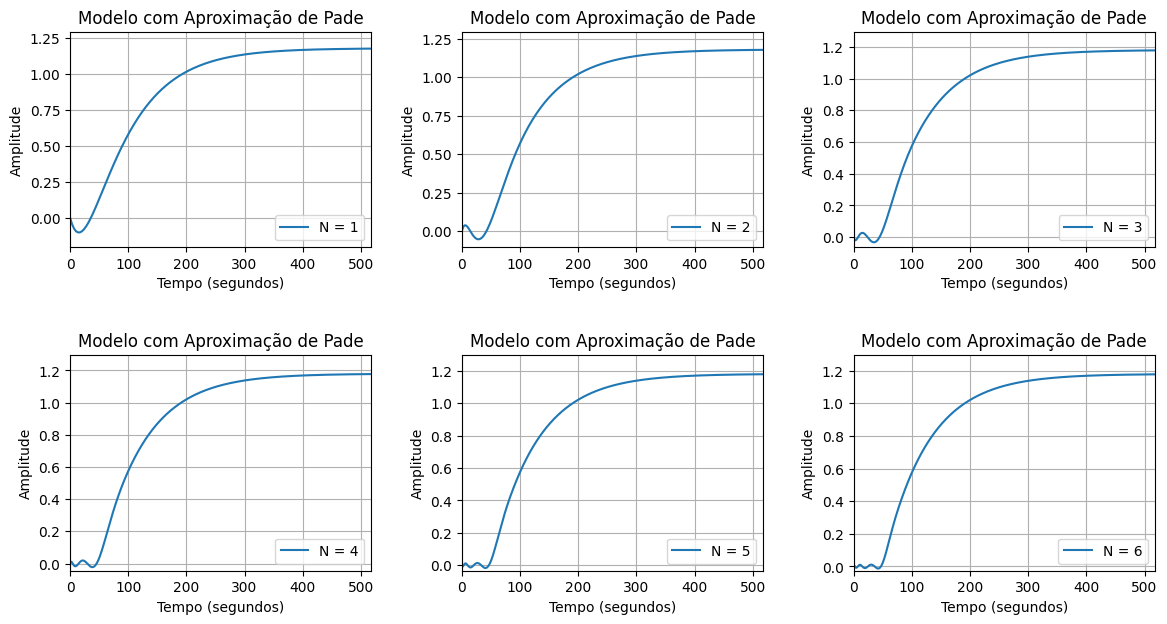

<Figure size 640x480 with 0 Axes>

In [36]:

fig, axs = plt.subplots(2, 3, figsize=(14, 7))
sys = ctrl.tf([1.18], [75, 1])

for N in range(1, 7):
  ax = axs[0 if N <= 3 else 1, (N-1) if N <= 3 else (N-4)]

  # Modelagem da Malha de Controle:
  [num, den] = ctrl.pade(50, N)
  sys_pade = ctrl.tf(num, den)
  sys_atraso = ctrl.series(sys, sys_pade)

  # Amostras de Amplitude da Resposta ao Degrau ao longo do Tempo.
  # ctrl.step_response(sys).plot()
  [Tempo, Amplitude] = ctrl.step_response(sys_atraso)

  ax.plot(Tempo, Amplitude)
  ax.legend([f'N = {N}'], loc='lower right')
  ax.set_title('Modelo com Aproximação de Pade')
  ax.set_xlabel('Tempo (segundos)'), ax.set_xlim([0, Tempo[-1]])
  ax.set_ylabel('Amplitude'), ax.set_ylim([np.min(Amplitude)*2, np.max(Amplitude)*1.1])
  ax.grid(True)

plt.subplots_adjust(hspace=0.5, wspace=0.3)
print(), plt.show(), plt.savefig('Degrau.png', dpi=300);

Note que a Aproximação de Padé gera oscilações em torno do Valor Inicial do Processo, e que essas oscilações são mais amortecidas para $R_{N}(s)$ com ordem mais elevada. A partir de uma determinada ordem (a depender do tipo de sistema), a Aproximação de Padé é identica ao Atraso Puro de Tempo.

### **Parâmetros da Resposta do Sistema - `step_info()`**
O método `step_info(sys)` retorna um `dict` com os parâmetros da Resposta ao Degrau do Sistema de Controle:
  - ***RiseTime* (Tempo de Subida)**: tempo de $10\%$ a $90\%$ do valor final;
  - ***SettlingTime* (Tempo de Acomodação)**: tempo para entrar no regime permanente segundo o Critério dos $2\%$, a $98\%$ do valor final;
  - ***SteadyStateValue* (Valor Final)**: amplitude do processo em regime permanente.

Acesse: [Método step_info()](https://python-control.readthedocs.io/en/0.10.1/generated/control.step_info.html#control.step_info)


In [16]:
infos_malhaAberta = ctrl.step_info(sys);
print('Parâmetros da resposta do Sistema:',
      f'  - Tempo de Subida: {infos_malhaAberta.get("RiseTime"):.2f} [s]',
      f'  - Tempo de Acomodação: {infos_malhaAberta.get("SettlingTime"):.2f} [s]',
      f'  - Valor Final: {infos_malhaAberta.get("SteadyStateValue"):.2f}', sep='\n')

Parâmetros da resposta do Sistema:
  - Tempo de Subida: 66.98 [s]
  - Tempo de Acomodação: 119.32 [s]
  - Valor Final: 1.18


In [17]:
infos_malhaAberta = ctrl.step_info(sys_atraso);
print('Parâmetros da resposta do Sistema:',
      f'  - Tempo de Subida: {infos_malhaAberta.get("RiseTime"):.2f} [s]',
      f'  - Tempo de Acomodação: {infos_malhaAberta.get("SettlingTime"):.2f} [s]',
      f'  - Valor Final: {infos_malhaAberta.get("SteadyStateValue"):.2f}', sep='\n')

Parâmetros da resposta do Sistema:
  - Tempo de Subida: 67.01 [s]
  - Tempo de Acomodação: 127.79 [s]
  - Valor Final: 1.18


In [18]:
infos_malhaAberta.keys()

dict_keys(['RiseTime', 'SettlingTime', 'SettlingMin', 'SettlingMax', 'Overshoot', 'Undershoot', 'Peak', 'PeakTime', 'SteadyStateValue'])

Note, pela definição de cada parâmetro, que os **Tempos de Subida** para os sistemas sem e com Atraso são iguais. A diferença entre os **Tempos de Acomodação** é exatamente o Tempo de Atraso do Sistema.

Como o Atraso não modifica a dinâmica de Amplitudes do Processo, o valor final (e qualquer outra amostra de Amplitude) é o mesmo.

**Observação:** para alguns tipos de sistema, em especial para sistemas controlados, o método `ctrl.step_info()` desconsidera o Tempo de Atraso na medida do Tempo de Subida, sendo necessário descontá-lo para inferência correta do parâmetro.

### **Sistemas de Primeira Ordem em Malha Fechada:**
Um Sistema de Controle em Malha Fechada, ilustrado na figura a seguir, opera com uma Malha de Realimentação (*feedback*) que compara os valores da saída - $PV(s)$ e da entrada - $SP(s)$, definindo o erro do Sistema, $e = SP(s) - PV(s)$.

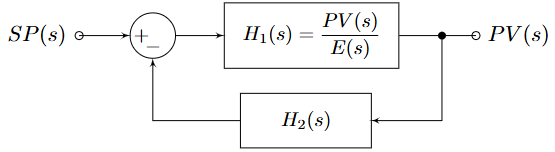

Sendo $H_1(s)$ a função de Transferência da Malha de Controle e $H_2(s)$, a Malha de Realimentação, a equivalente $H(s)$ do Sistema em Malha Fechada é dada como: $$$$

$$ H(s) = \frac{H_1(s)}{1+H_1(s)\cdot H_2(s)}, $$ $$$$

em que o sinal do denominador é oposto à realimentação de $PV(s)$. A realimentação padrão é negativa e unitária.

Por implementação, o método `ctrl.feedback()` não retorna a Função de Transferência na forma canônica. Acesse [Método feedback()](https://python-control.readthedocs.io/en/0.10.1/generated/control.InterconnectedSystem.html#control.InterconnectedSystem.feedback)

In [19]:
sys_fechada = ctrl.feedback(sys_atraso)
print(sys_fechada)

<TransferFunction>: sys[41]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


    -1.18 s + 0.236
-----------------------
30 s^2 + 5.82 s + 0.436



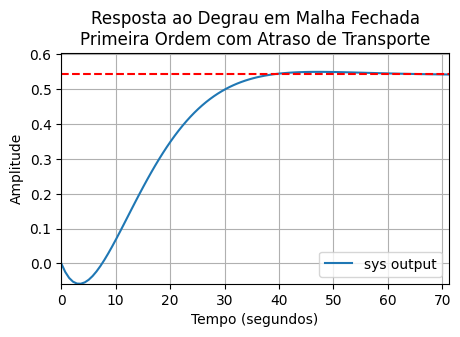

<Figure size 640x480 with 0 Axes>

In [21]:
# Amostras de Amplitude da Resposta ao Degrau ao longo do Tempo.
# ctrl.set_responde(sys_fechada).plot()
[Tempo, Amplitude] = ctrl.step_response(sys_fechada)

plt.figure(figsize=(5, 3)), plt.plot(Tempo, Amplitude)
plt.axhline(y=Amplitude[-1], color='r', linestyle='--')

plt.title('Resposta ao Degrau em Malha Fechada\nPrimeira Ordem com Atraso de Transporte')
plt.xlabel('Tempo (segundos)'), plt.xlim([0, Tempo[-1]])
plt.ylabel('Amplitude'), plt.ylim([np.min(Amplitude), np.max(Amplitude)*1.1])
plt.legend(['sys output'], loc='lower right'), plt.grid(True)

print()
plt.show(), plt.savefig('malhaFechada.png', dpi=300);

In [22]:
infos_malhaFechada = ctrl.step_info(sys_fechada);
print('Parâmetros da resposta do Sistema em Malha Fechada:',
      f'  - Tempo de Subida: {infos_malhaFechada.get("RiseTime"):.2f} [s]',
      f'  - Tempo de Acomodação: {infos_malhaFechada.get("SettlingTime"):.2f} [s]',
      f'  - Valor Final: {infos_malhaFechada.get("SteadyStateValue"):.2f}', sep='\n')

Parâmetros da resposta do Sistema em Malha Fechada:
  - Tempo de Subida: 18.70 [s]
  - Tempo de Acomodação: 35.25 [s]
  - Valor Final: 0.54
